[('Andhra Pradesh', 63.35638960204581), ('Arunachal Pradesh', 81.23184924780018), ('Assam', 69.5155827580561), ('Bihar', 70.82245857417914), ('Chandigarh', 67.38381930329994), ('Dadra & Nagar Haveli', 68.73288482976932), ('Daman & Diu', 70.67437311036305), ('Goa', 96.88459452738398), ('Gujarat', 73.54396676774086), ('Haryana', 67.32941123410872), ('Himachal Pradesh', 58.72351008962014), ('Jammu And Kashmir', 74.68656707869253), ('Karnataka', 59.962201977984364), ('Kerala', 78.61062659604546), ('Lakshadweep', 100.0), ('Madhya Pradesh', 54.221369094550276), ('Maharashtra', 66.47406180883257), ('Meghalaya', 92.10015213148851), ('Mizoram', 93.62948699138124), ('Nagaland', 90.71985364070483), ('Orissa', 54.04427419794044), ('Puducherry', 60.544666939043154), ('Punjab', 57.6119849467309), ('Rajasthan', 58.507398498783765), ('Sikkim', 61.79975646162696), ('Tamil Nadu', 64.6588930735378), ('Tripura', 53.7462710056355), ('Uttar Pradesh', 65.20646066868747)]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

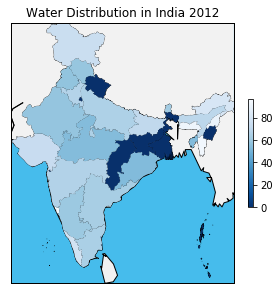

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby

import matplotlib.cm

from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np

data = pd.read_csv('/Users/GJ/Desktop/New/final_dataset_for_2012.csv')
data['State Name'] = data['State Name'].str.title()
coveredpop_list = []
totalpop_list = []

states_group = data.groupby('State Name')
for key, group in states_group:
    coveredpop = 0
    totalpop = 0
    for row in group.iterrows():
        coveredpop += row[1][1]*row[1][10] + row[1][2]*row[1][11] + row[1][3]*row[1][12]
        totalpop += row[1][1] + row[1][2] + row[1][3]
    coveredpop = coveredpop/totalpop    
    coveredpop_list.append((key,coveredpop))
    totalpop_list.append((key,totalpop))
print(coveredpop_list)

fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('/Users/GJ/Desktop/New/Map/INDIA/INDIA','INDIA')
covlist = []
m.INDIA_info

for state_info in m.INDIA_info:
    state = state_info['ST_NAME']
    cov1 = 0
    
    for x in coveredpop_list:
        if x[0] == state:
            cov1 = x[1]
            break
    covlist.append(cov1)
print(covlist)
df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['ST_NAME'] for area in m.INDIA_info],
                       'covlist': covlist})

shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Blues_r')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['covlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(covlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('Water Distribution in India 2012')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

